In [18]:
# Import Libraries and Packages

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [19]:
# Load Data
rfm = pd.read_csv('/content/rfm_clusters.csv', index_col=0)


In [20]:
# Features (log-transformed)
X = rfm[['Recency', 'Frequency_log', 'Monetary Value_log']]
y = rfm['Cluster']

In [21]:
# Features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [22]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Cross-validation to find best k
k_values = range(1, 16)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [25]:
# Find best k
best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)

Best k: 6


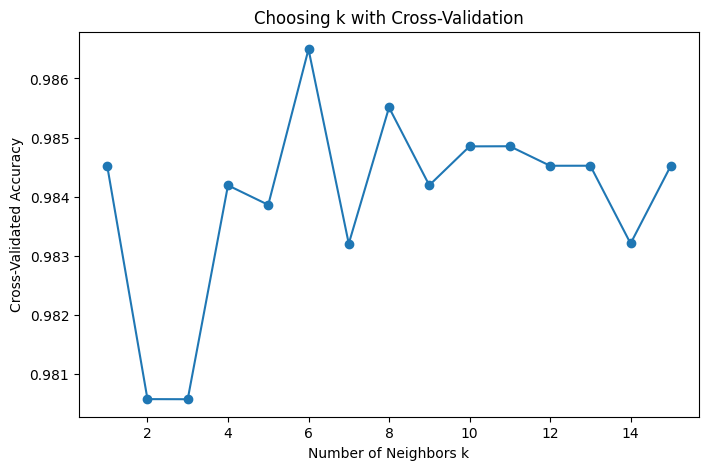

In [26]:
# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing k with Cross-Validation')
plt.show()

In [27]:
# Train final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [28]:
# Predict
y_pred = knn.predict(X_test_scaled)

In [29]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[605   0   3]
 [  5 290   0]
 [  1   1 397]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       608
           1       1.00      0.98      0.99       295
           2       0.99      0.99      0.99       399

    accuracy                           0.99      1302
   macro avg       0.99      0.99      0.99      1302
weighted avg       0.99      0.99      0.99      1302


Accuracy Score: 0.9923195084485407


In [ ]:
import json

# Save weighted average metrics from classification_report
report = classification_report(y_test, y_pred, output_dict=True)

# Optional: print to verify
print(json.dumps(report["weighted avg"], indent=2))

# Save to JSON file
with open("../data/classification_report.json", "w") as f:
    json.dump(report["weighted avg"], f)
